In [1]:
import csv
import xlrd
from pandas import DataFrame
import os
from os import listdir
from datetime import datetime, timedelta

import pandas as pd
import pandas_gbq
from datetime import datetime, timedelta
import time 
import re
from google.cloud import bigquery

# 접속 정보 : local
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./boxwood-**************************.json"
client = bigquery.Client()

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)


In [2]:
project = 'boxwood-******************'
dataset_id = 'SAP_BW'
project_id = project

In [3]:
sql = """
SELECT FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME)) as DATE, count(*) as CNT
FROM `boxwood-******************.SAP_BW.ZPB_PP_Q001`
where PROD_LV1 = 'Plant& 제품군'
group by FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME))
"""
df1 = pandas_gbq.read_gbq(sql, project_id=project_id)
df1 = df1.sort_values(by=['DATE']).reset_index(drop=True)

Downloading: 100%|███████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 27.98rows/s]


In [4]:
sql = """
SELECT FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME)) as DATE, count(*) as CNT
FROM `boxwood-******************.SAP_BW.ZPB_LE_Q001`
where PROD_LV1 = 'Plant& 제품군'
group by FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME))
"""
df2 = pandas_gbq.read_gbq(sql, project_id=project_id)
df2 = df2.sort_values(by=['DATE']).reset_index(drop=True)

Downloading: 100%|███████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 23.37rows/s]


In [11]:
sql = """
SELECT FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME)) as DATE, count(*) as CNT
FROM `boxwood-******************.SAP_BW.ZPB_SD_Q013`
where PROD_LV1 = 'Plant& 제품군'
group by FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME))
"""
df3 = pandas_gbq.read_gbq(sql, project_id=project_id)
df3 = df3.sort_values(by=['DATE']).reset_index(drop=True)

Downloading: 100%|███████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 60.11rows/s]


In [6]:
sql = """
SELECT FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME)) as DATE, count(*) as CNT
FROM `boxwood-******************.SAP_BW.ZPB_SD_Q002`
where PROD_LV1 = 'Plant& 제품군'
group by FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME))
"""
df4 = pandas_gbq.read_gbq(sql, project_id=project_id)
df4 = df4.sort_values(by=['DATE']).reset_index(drop=True)

Downloading: 100%|███████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 59.30rows/s]


In [7]:
sql = """
SELECT FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME)) as DATE, count(*) as CNT
FROM `boxwood-******************.SAP_BW.ZPB_SD_Q016`
where PROD_LV1 = 'Plant& 제품군'
group by FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME))
"""
df5 = pandas_gbq.read_gbq(sql, project_id=project_id)
df5 = df5.sort_values(by=['DATE']).reset_index(drop=True)

Downloading: 100%|███████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 59.40rows/s]


In [8]:
sql = """
SELECT FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME)) as DATE, count(*) as CNT
FROM `boxwood-**************.SAP_BW.ZPB_CO_Q001_P`
where PROD_LV1 = 'Plant& 제품군'
group by FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME))
"""
df6 = pandas_gbq.read_gbq(sql, project_id=project_id)
df6 = df6.sort_values(by=['DATE']).reset_index(drop=True)

Downloading: 100%|███████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 70.70rows/s]


In [9]:
sql = """
SELECT FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME)) as DATE, count(*) as CNT
FROM `boxwood-**************.SAP_BW.ZPB_CO_Q001_R`
where PROD_LV1 = 'Plant& 제품군'
group by FORMAT_DATETIME('%y/%m', CAST(DATE AS DATETIME))
"""
df7 = pandas_gbq.read_gbq(sql, project_id=project_id)
df7 = df7.sort_values(by=['DATE']).reset_index(drop=True)

Downloading: 100%|███████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 56.83rows/s]


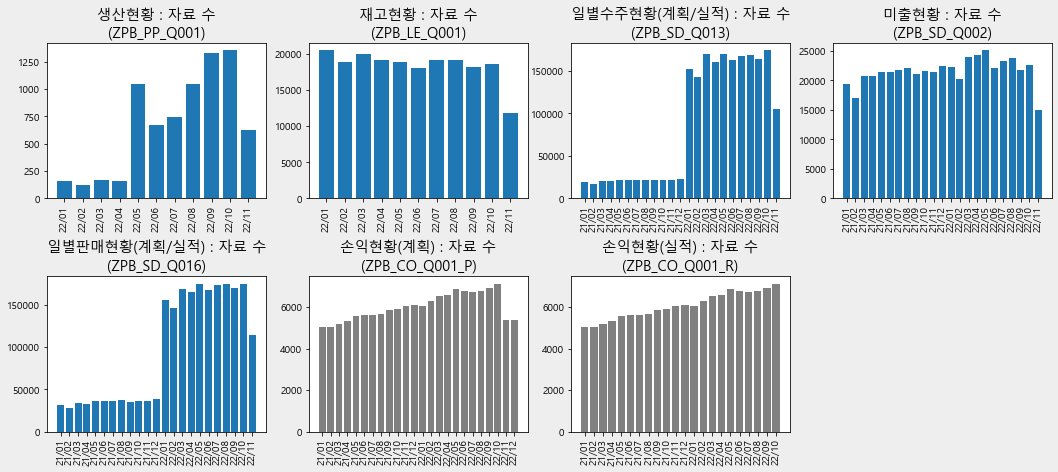

In [14]:
fig = plt.figure(figsize=(18, 6), facecolor='#eeeeee' )


plt.subplot(2,4,1)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)
plt.bar(df1.DATE, df1.CNT)
plt.xticks(rotation=90)
plt.title('{} : 자료 수\n({})'.format('생산현황', 'ZPB_PP_Q001'),fontsize='x-large')


plt.subplot(2,4, 2)
plt.bar(df2.DATE, df2.CNT)
plt.xticks(rotation=90)
plt.title('{} : 자료 수\n({})'.format('재고현황', 'ZPB_LE_Q001'),fontsize='x-large')


plt.subplot(2,4, 3)
plt.bar(df3.DATE, df3.CNT)
plt.xticks(rotation=90)
plt.title('{} : 자료 수\n({})'.format('일별수주현황(계획/실적)', 'ZPB_SD_Q013'),fontsize='x-large')

plt.subplot(2,4, 4)
plt.bar(df4.DATE, df4.CNT)
plt.xticks(rotation=90)
plt.title('{} : 자료 수\n({})'.format('미출현황', 'ZPB_SD_Q002'),fontsize='x-large')

plt.subplot(2,4, 5)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=1, wspace=0.2, hspace=0.5)
plt.bar(df5.DATE, df5.CNT)
plt.xticks(rotation=90)
plt.title('{} : 자료 수\n({})'.format('일별판매현황(계획/실적)', 'ZPB_SD_Q016'),fontsize='x-large')

plt.subplot(2,4, 6)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=1, wspace=0.2, hspace=0.5)
plt.bar(df6.DATE, df6.CNT, color = 'gray')
plt.xticks(rotation=90)
plt.title('{} : 자료 수\n({})'.format('손익현황(계획)', 'ZPB_CO_Q001_P'),fontsize='x-large')

plt.subplot(2,4, 7)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=1, wspace=0.2, hspace=0.5)
plt.bar(df7.DATE, df7.CNT, color = 'gray')
plt.xticks(rotation=90)
plt.title('{} : 자료 수\n({})'.format('손익현황(실적)', 'ZPB_CO_Q001_R'),fontsize='x-large')

plt.show()